# Evaluation Quantum Computing


## Instructions

Your goal is to complete the notebook with the correct answers.

Once done, send your notebook file (FIRSTNAME_NAME.ipynb) to : 

gaetan.rubez@atos.net

Do it before the end of the 3-hour session.

**NOTE: To evaluate your notebook I will only run once each cell using the option Cell > Run All, so make sure to not have failing cells.**


## Implementing circuits with myQLM

### Bell state and futher

**Q1- Write down a code to have the circuit of the bell state $ \frac{1}{\sqrt{2}} (|00> + |11>)$ and display it. Such circuit look like:**

 <img src="EPR.PNG" width="33%">



In [1]:
from qat.lang.AQASM import *

In [2]:
pr = Program()
qubits_reg = pr.qalloc(2)
pr.apply(H, qubits_reg[0])
pr.apply(CNOT, qubits_reg[0], qubits_reg[1])
circ = pr.to_circ()

%qatdisplay --svg circ

**Q2 - Write down a code to simulate the circuit with PyLinalg to verify that you obtain the right state:**

In [3]:
from qat.qpus import PyLinalg
qpu = PyLinalg()
job = circ.to_job()
result = qpu.submit(job)
for sample in result:
    print("We measured the state {} (its probability is {} and its amplitude {})".format(sample.state, sample.probability, sample.amplitude))

We measured the state |00> (its probability is 0.4999999999999999 and its amplitude (0.7071067811865475+0j))
We measured the state |11> (its probability is 0.4999999999999999 and its amplitude (0.7071067811865475+0j))


**Q3- Write down a code to have a circuit producing the state $ \frac{1}{\sqrt{2}} (|000> + |111>)$, display it and simulate it to verify the result:**

In [4]:
pr = Program()
qubits_reg = pr.qalloc(3)
pr.apply(H, qubits_reg[0])
pr.apply(CNOT, qubits_reg[0], qubits_reg[1])
pr.apply(CNOT, qubits_reg[0], qubits_reg[2])
circ = pr.to_circ()

%qatdisplay --svg circ

In [5]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job() 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |000> amplitude (0.7071067811865475+0j) probability 0.4999999999999999 
State |111> amplitude (0.7071067811865475+0j) probability 0.4999999999999999 


**Q4- Write down a code that produces a QRoutine of arity *n* (*n* being a parameter) obtaining the state $ \frac{1}{\sqrt{2}} (|0...0> + |1...1>)$ when applyied to the state |0...0>:**

In [6]:
from qat.lang.AQASM import Program, QRoutine, H
def BELL_ROUTINE(n): 
    bell_routine =  QRoutine() 
    bell_routine.apply(H, 0) 
    for i in range(n-1):
        bell_routine.apply(CNOT, 0, i+1) 
    return bell_routine 

**Q5- Write down a code using the previous QRoutine to obtain a circuit producing the state $\frac{1}{\sqrt{2}}(|000000>+|111111>)$, display it and simulate it:**

In [7]:
pr = Program() 
qubits_reg = pr.qalloc(6) 
#Use this routine 
pr.apply(BELL_ROUTINE(6), qubits_reg) 
circ = pr.to_circ() 
%qatdisplay --svg circ

In [8]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job() 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |000000> amplitude (0.7071067811865475+0j) probability 0.4999999999999999 
State |111111> amplitude (0.7071067811865475+0j) probability 0.4999999999999999 


### Quantum teleportation

In this part you are going to implement the protocol to theoretically do quantum teleportation a.k.a teleport a quantum state from a qubit to another qubit.

 <img src="teleportation.PNG" width="66%">

In short, this protocol is composed of:
- A register of three qubits
- A register of two bits
- An Hadamard gate on qubit 1
- A CNOT with qubit 1 as the controller and qubit 2 as the target
- A CNOT with qubit 0 as the controller and qubit 1 as the target
- An Hadamard gate on qubit 0
- A measurement of the qubit 0 stored in the bit 0
- A measurement of the qubit 1 stored in the bit 1
- An X gate on qubit 2 classically controlled by the bit 1
- A Z gate on qubit 2 classically controlled by the bit 0

The idea of this protocol is to teleport the state of the qubit 0 to the qubit 2 by using an initially entangled pair of qubits (here qubit 1 and qubit 2).

**Q6- Write down a code producing such circuit and display it:**

In [9]:
from qat.lang.AQASM import *
from qat.lang.AQASM import Program
#Create a program
pr = Program()
#Allocate qubits
qbits = pr.qalloc(3)
#Allocate bits
cbits = pr.calloc(2)

pr.apply(H, qubits_reg[1])
pr.apply(CNOT, qubits_reg[1], qubits_reg[2])
pr.apply(CNOT, qubits_reg[0], qubits_reg[1])
pr.apply(H, qubits_reg[0])
#Measure qbits in cbits
pr.measure(qbits[0], cbits[0])
pr.measure(qbits[1], cbits[1])


pr.cc_apply(cbits[1], X, qbits[2])
pr.cc_apply(cbits[0], Z, qbits[2])

circ = pr.to_circ() 
%qatdisplay --svg circ

**Q7 - Simulate the previous circuit and only measure the last qubit (index 2):**

In [10]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job(qubits=[2]) 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |0> amplitude None probability 1.0 


**Q8 - The result of Q7 is |0> with probability 1.0, explain why:**

Q1 et Q2 reste intriquer, arriver a X: si Q2=1 alors on applique la porte et Q2=0. Si Q2=0 alors Q2=0 car la porte X ne s'applique pas. Puis arriver a la porte Z on arrive avec une un état 0 avec une prob de 1.

**Q9 - Change the initial state of the qubit 0 by adding a X gate such that you generate and display the following circuit:**
 <img src="xteleportation.PNG" width="66%">

In [11]:
from qat.lang.AQASM import *
from qat.lang.AQASM import Program
#Create a program
pr = Program()
#Allocate qubits
qbits = pr.qalloc(3)
#Allocate bits
cbits = pr.calloc(2)

pr.apply(H, qubits_reg[1])
pr.apply(X, qubits_reg[0])
pr.apply(CNOT, qubits_reg[1], qubits_reg[2])
pr.apply(CNOT, qubits_reg[0], qubits_reg[1])
pr.apply(H, qubits_reg[0])
#Measure qbits in cbits
pr.measure(qbits[0], cbits[0])
pr.measure(qbits[1], cbits[1])


pr.cc_apply(cbits[1], X, qbits[2])
pr.cc_apply(cbits[0], Z, qbits[2])

circ = pr.to_circ() 
%qatdisplay --svg circ

**Q10 - Simulate the previous circuit and only measure the last qubit (index 2):**

In [12]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job(qubits=[2]) 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |1> amplitude None probability 1.0 


**Q11 - The result of Q10 is |1> with probability 1.0, explain why:**

Q1 et Q2 reste intriquer, Q2=1 a cause du X sur le Q1 et le CNOT. Q1 et Q2 sont intriqué et donc grace au X alors on a 1.

**Q12 - Change the initial state of the qubit 0 by adding a H gate such that you generate and display the following circuit:**

 <img src="hteleportation.PNG" width="66%">

In [13]:
from qat.lang.AQASM import *
from qat.lang.AQASM import Program
#Create a program
pr = Program()
#Allocate qubits
qbits = pr.qalloc(3)
#Allocate bits
cbits = pr.calloc(2)

pr.apply(H, qubits_reg[1])
pr.apply(H, qubits_reg[0])
pr.apply(CNOT, qubits_reg[1], qubits_reg[2])
pr.apply(CNOT, qubits_reg[0], qubits_reg[1])
pr.apply(H, qubits_reg[0])
#Measure qbits in cbits
pr.measure(qbits[0], cbits[0])
pr.measure(qbits[1], cbits[1])


pr.cc_apply(cbits[1], X, qbits[2])
pr.cc_apply(cbits[0], Z, qbits[2])

circ = pr.to_circ() 
%qatdisplay --svg circ

**Q13 - Simulate the previous circuit and only measure the last qubit (index 2):**

In [14]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job(qubits=[2]) 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |0> amplitude None probability 0.4999999999999999 
State |1> amplitude None probability 0.4999999999999999 


**Q14- The result of Q13 is 50% to get |0> and 50% to get |1>, explain why:**

Q1 et Q2 reste intriquer, et on a 50/50 en probabilité a cause des 2 X du début. Le X ne change pas cette état.

### Arithmetic on QPU

The following circuit allows to increment a number stored in a 4-qubit register:

<img src="increment.PNG" width="33%">

**Q15- Create a QRoutine producing the above circuit, and display it.**

In [15]:
qpu_routine = QRoutine() 
nbqbits = 4 
qpu_routine.apply(X.ctrl(nbqbits-1),range(nbqbits)) 
qpu_routine.apply(X.ctrl(nbqbits-2),range(nbqbits - 1)) 
qpu_routine.apply(CNOT, 0, 1) 
qpu_routine.apply(X, 0)

%qatdisplay qpu_routine --svg

**Q16- Apply the QRoutine in a program and simulate the result.**

In [16]:
pr = Program() 
qubits_reg = pr.qalloc(4) 
#Use this routine 
pr.apply(qpu_routine, qubits_reg) 
circ = pr.to_circ() 
%qatdisplay --svg circ

In [17]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job() 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |1000> amplitude (1+0j) probability 1.0 


**Q17- Does this circuit increment LSB formalism or MSB formalism?**

LSB formalism

**Q18- Apply the daggerization of the increment QRoutine, display the circuit and simulate it:**

In [18]:
pr = Program() 
qubits_reg = pr.qalloc(4) 
pr.apply(qpu_routine.dag(),qubits_reg)
circ = pr.to_circ()
%qatdisplay --svg circ

In [19]:
from qat.qpus import PyLinalg 
qpu = PyLinalg() 
job = circ.to_job() 
result = qpu.submit(job) 
for sample in result:
    print("State %s amplitude %s probability %s " % (sample.state, sample.amplitude, sample.probability)) 

State |1111> amplitude (1+0j) probability 1.0 


**Q19 - What is operation done by the daggerization of the increment QRoutine?**

On inverse la Qroutine créé précédemment

### Grover

The Grover's algorithm is an important piece of quantum computing. Grover’s algorithm is well known as a quantum search algorithm that requires quadratically less calls to the oracle than the classical counterpart.

The idea behind Grover's algorithm is to iteratively amplify the probability to obtain the result we are seaching for.

In this part you are going to study the Grover's algorithm on a dummy example that in the general case look like:

<img src="grover.PNG">

N = $2^n$ being the number of element we are searching in the index we are searching for.

A Grover's iteration is composed of two parts :

<img src="grover_iter.PNG">

The next cell, provides you an oracle that will mark the state 2 using a register of 3 qubits for the seach space and another qubit properly set up as illustrated above. 

In [34]:
from qat.lang.AQASM.misc import build_gate
@build_gate("Oracle", [int], arity=lambda nbqbits: nbqbits)
def oracle_2(nbqbits):
    oracle = QRoutine()
    oracle.apply(X,0)
    oracle.apply(X,2)
    oracle.apply(X.ctrl(nbqbits-1),range(nbqbits))
    oracle.apply(X,2)
    oracle.apply(X,0)
    return oracle

example = oracle_2(4)
%qatdisplay --svg example

The following cell, provides you a QRoutine for the diffusion operator by specifying the number of qubits using the variable nbqbits.

In [35]:
@build_gate("Diffusion", [int], arity=lambda nbqbits: nbqbits)
def diffusion(nbqbits):
    rout = QRoutine()
    wires = rout.new_wires(nbqbits)
    with rout.compute():
        for wire in wires:
            H(wire)
            X(wire)
    Z.ctrl(nbqbits - 1)(wires)
    rout.uncompute()
    return rout

example = diffusion(4)
%qatdisplay --svg example

**Q20 - We are lacking the Walsh-Hadamard, write a function that can generate QRoutine of arity n (n being a parameter) that apply one Hadamard gate on each qubit, display it:**

In [36]:
#Define your walsh Hadamard
def WALSH_HADAMARD(n):
    walsh_Hadamard_routine =  QRoutine()
    for i in range(n):
        walsh_Hadamard_routine.apply(H, i)
    return walsh_Hadamard_routine
pr = Program()
qubits = pr.qalloc(4)
pr.apply(WALSH_HADAMARD(4),qubits)

circ = pr.to_circ()
%qatdisplay --svg circ 

**Q21 - Build a circuit using the previous element that run the Grover's algorithm for a single iteration ,display it and simulate it. For the simulation, display the state as an integer and the associated probability.**

In [43]:
from qat.lang.AQASM import * 
from qat.qpus import get_default_qpu

pr = Program() 
qubits = pr.qalloc(4) 
pr.apply(WALSH_HADAMARD(4),qubits) 
pr.apply(oracle_2(4),qubits) 
pr.apply(diffusion(3),qubits[0:3]) 

circ = pr.to_circ() 
job = circ.to_job() 
# Instantiate a QPU (simulator) 
qpu = get_default_qpu() 
# Execute 
result = qpu.submit(job) 
for sample in result:
    print("State %s: probability %s, amplitude %s" % (sample.state, sample.probability, sample.amplitude))
%qatdisplay --svg circ 

State |0000>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0001>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0010>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0011>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0100>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0101>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0110>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |0111>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |1000>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |1001>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |1010>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |1011>: probability 0.0624999999999999, amplitude (-0.2499999999999998+0j)
State |1100>: probability 0.

**Q22 - Build a circuit using the previous element that run the Grover's algorithm for two iterations ,display it and simulate it. For the simulation, display the state as an integer and the associated probability.**

In [41]:
from qat.lang.AQASM import *

pr = Program()
qubits = pr.qalloc(4)
pr.apply(WALSH_HADAMARD(4),qubits)
pr.apply(oracle_2(4),qubits)
pr.apply(diffusion(3),qubits[0:3])

pr.apply(oracle_2(4),qubits)
pr.apply(diffusion(3),qubits[0:3])

circ = pr.to_circ()
%qatdisplay --svg circ

job = circ.to_job()

# Instantiate a QPU (simulator)
qpu = get_default_qpu()

# Execute
result = qpu.submit(job)
for sample in result:
    print("State %s: probability %s, amplitude %s" % (sample.state, sample.probability, sample.amplitude))

State |0000>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0001>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0010>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0011>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0100>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0101>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0110>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |0111>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |1000>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |1001>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |1010>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |1011>: probability 0.06249999999999985, amplitude (0.2499999999999997+0j)
State |1100>: probability 0.

**Q23 - Build a circuit using the previous element that run the Grover's algorithm for three iterations ,display it and simulate it. For the simulation, display the state as an integer and the associated probability.**

In [42]:
from qat.lang.AQASM import *

pr = Program()
qubits = pr.qalloc(4)
pr.apply(WALSH_HADAMARD(4),qubits)
pr.apply(oracle_2(4),qubits)
pr.apply(diffusion(3),qubits[0:3])

pr.apply(oracle_2(4),qubits)
pr.apply(diffusion(3),qubits[0:3])

pr.apply(oracle_2(4),qubits)
pr.apply(diffusion(3),qubits[0:3])

circ = pr.to_circ()
%qatdisplay --svg circ

job = circ.to_job()

# Instantiate a QPU (simulator)
qpu = get_default_qpu()

# Execute
result = qpu.submit(job)
for sample in result:
    print("State %s: probability %s, amplitude %s" % (sample.state, sample.probability, sample.amplitude))

State |0000>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0001>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0010>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0011>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0100>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0101>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0110>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |0111>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |1000>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |1001>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |1010>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
State |1011>: probability 0.06249999999999978, amplitude (-0.24999999999999956+0j)
Stat

**Q24 - In that specific case, how many iterations of Grover's algorithm was able to produce the highest probability to obtain 2?**

Please, answer Q24 in this cell.

### MaxCut

**Q25 - Using networkx library, create a graph with the following specifications and display it:**
<img src="graph.PNG">

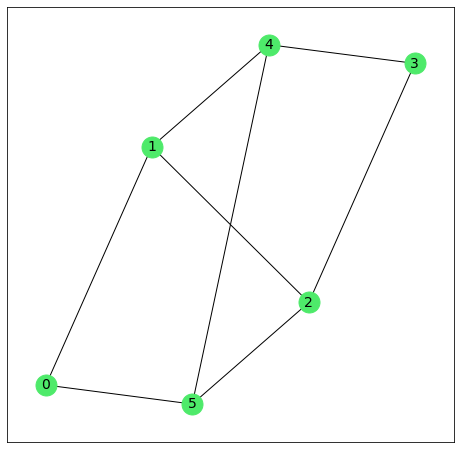

In [23]:
#This cell will create the graph (Nothing to complete here)
#Import networkx 
import networkx as nx

#Create our simple graph
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5])
G.add_edge(0, 1)
G.add_edge(0, 5)
G.add_edge(1, 0)
G.add_edge(1, 2)
G.add_edge(1, 4)
G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(3, 2)
G.add_edge(3, 4)
G.add_edge(4, 1)
G.add_edge(4, 3)
G.add_edge(4, 5)
G.add_edge(5, 0)
G.add_edge(5, 2)
G.add_edge(5, 4)

#Plot our graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nodes_positions = nx.spring_layout(G, iterations=len(G.nodes())*100)
nx.draw_networkx(G, 
                 pos=nodes_positions, 
                 node_color='#4EEA6A', 
                 node_size=440, 
                 font_size=14)
plt.show()

**Q26 - Generate the MaxCut problem associated to this graph using function available in myQLM:**

In [24]:
from qat.vsolve.qaoa import MaxCut
problem = MaxCut(G)
print(problem)

MaxCut:
 6 variables, 8 clauses


**Q27 - Generate the QAOA ansatz with a single layer associated to the above MaxCut Problem:**

In [25]:
circuit1 = problem.qaoa_ansatz(1).circuit 

**Q28 - Display the circuit of the above QAOA ansatz**

In [26]:
%qatdisplay --svg circuit1 

**Q29 - Design a stack to run the optimization of the parameters:**

In [27]:
from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin
qpu = get_default_qpu()
stack = ScipyMinimizePlugin(method="COBYLA",
                            tol=1e-2, 
                            options={"maxiter":150}) | qpu


**Q30 - Submit the previous QAOA ansatz to the stack and print the final energy:**

In [28]:
# We can directly call the to_job method of the Problem class to pack an Ansatz and 
# the cost observable in a single abstract Job
job = problem.qaoa_ansatz(1) # Here 1 is the number of layers of the Ansatz
result = stack.submit(job)
print("Final energy:", result.value)

Final energy: -5.6323562209965345


**Q31 - Do a final run with optimal parameters and display the subsets in the graphs:**

Check, energy = -5.6323562209965345
Most probable states are:
|010101> 0.15159172265253906
|101010> 0.15159172265253906
And as bitstrings:
010101 0.15159172265253906
0 list : [0 2 4]
1 list : [1 3 5]



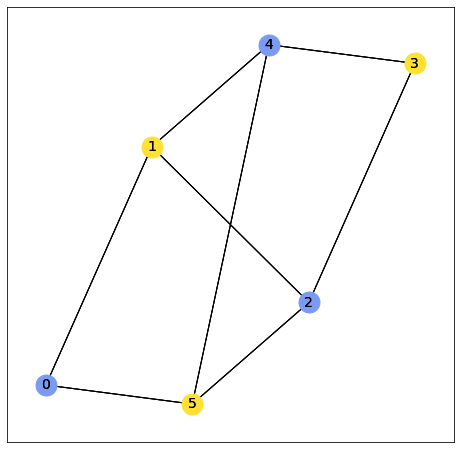

101010 0.15159172265253906
0 list : [1 3 5]
1 list : [0 2 4]



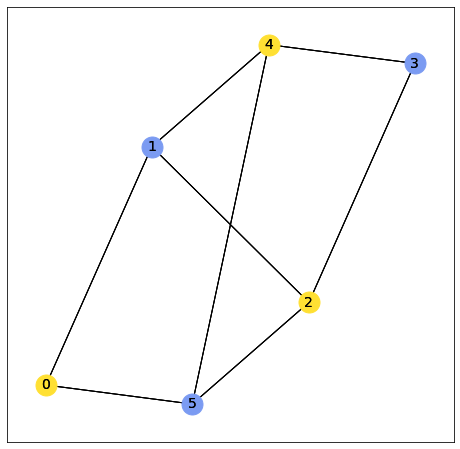

In [29]:
import numpy as np
#Retrieving the optimized parameters:
params = eval(result.meta_data['parameters'])

#Binding the variables:
sol_job = job(**{key: var for key, var in zip(job.get_variables(), params)})

#Checking that this indeeds gives the optimized energy
sol_res = qpu.submit(sol_job)
print("Check, energy =", sol_res.value)

#Rerunning in 'SAMPLE' mode to get the most probable states:
sampling_job = sol_job.circuit.to_job()
sol_res = qpu.submit(sampling_job)
print("Most probable states are:")
for sample in sol_res:
    if sample.probability > 0.05:
        print(sample.state, sample.probability)
# We can also directly cast states into bitstrings for practical use:
print("And as bitstrings:")
for sample in sol_res:
    if sample.probability > 0.05:
        print(sample.state.bitstring,  sample.probability)
        indices_bin_1 = np.where(np.array(list(sample.state.bitstring), dtype=int) == 1)[0]
        indices_bin_0 = np.where(np.array(list(sample.state.bitstring), dtype=int) == 0)[0]
        print("0 list : "+ str(indices_bin_0))
        print("1 list : " + str(indices_bin_1) + "\n")
        
        plt.figure(figsize=(8, 8))
        node_size = 440
        font_size = 14
        nx.draw_networkx(G, 
                         pos=nodes_positions, 
                         nodelist=indices_bin_1.tolist(), 
                         node_color='#FFE033', 
                         node_size=node_size, 
                         font_size=font_size)

        nx.draw_networkx(G, 
                         pos=nodes_positions, 
                         nodelist=indices_bin_0.tolist(), 
                         node_color='#7B9BF2', 
                         node_size=node_size, 
                         font_size=font_size)

        nx.draw_networkx_edges(G, pos=nodes_positions)
        plt.show()

**Q32 - How many edges should be cut with the optimal solution?**

Ils peuvent tous être coupé

**Q33 - Give two optimal solutions:**

010101 avec la probabilité 0.15050158769751554
101010 avec la probabilité 0.15050158769751554

**Do not forget to send me your file as mention at the beginning.**